# Calibration and attribution using a calibration list

This notebook shows how to proceed the following steps:

1. Read a mass spectrum file
2. Read a calibration list from a `.ref` file.
3. Extend the calibration list using isotopes
4. Recalibrate the mass spectrum
5. Proceed to the attribution

#### Load python modules

In [1]:
# optional python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# PyCM2C io package
from pyc2mc.io.peaklist import read_peaklist
from pyc2mc.io.caliblist import read_caliblist

# PyC2MC feature packages
from pyc2mc.core.formula_grid import FormulaGrid
from pyc2mc.processing.recalibration import Recalibration
from pyc2mc.processing.attribution import lowest_error_attribution

## Read the mass spectrum

The calibration list is read from the file [noncalibrated_sample.pks](data/noncalibrated_sample.pks).

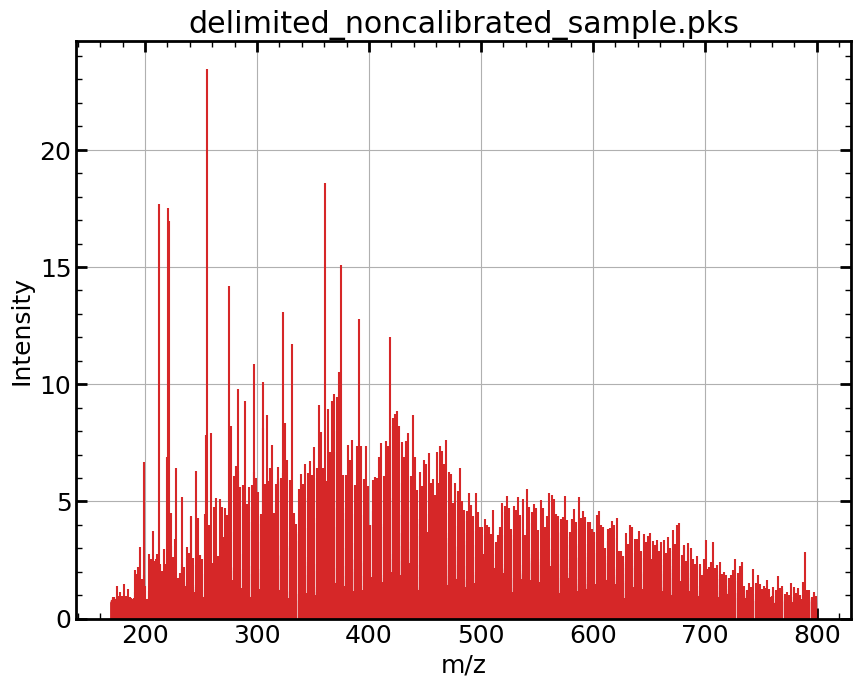

In [2]:
pl = read_peaklist("data/noncalibrated_sample.pks")
pl = pl.delimit(mz_bounds=(170, 800))
pl.plot();
#plt.xlim(200, 250)
#plt.ylim(0, 20)

## Load the calibration list

The calibration list is read from the file [BTG_BTL_ESI_-.ref](data/BTG_BTL_ESI_-.ref). The `.ref` file
contains the formula, the theoretical m/z values and the charge of the corresponding ions. It is important
to know the charge to be able to compute the ion exact mass.

In [3]:
cl = read_caliblist("data/BTG_BTL_ESI_-.ref")
cl

CalibList (20 peaks) 123.05 -> 731.38
Calibration Point: 123.05 (C7 H7 O2)
Calibration Point: 145.05 (C6 H9 O4)
Calibration Point: 177.06 (C10 H9 O3)
Calibration Point: 209.08 (C11 H13 O4)
Calibration Point: 245.08 (C14 H13 O4)
Calibration Point: 271.10 (C16 H15 O4)
Calibration Point: 303.09 (C16 H15 O6)
Calibration Point: 313.11 (C18 H17 O5)
Calibration Point: 341.10 (C19 H17 O6)
Calibration Point: 369.12 (C17 H21 O9)
Calibration Point: 395.13 (C19 H23 O9)
Calibration Point: 433.15 (C22 H25 O9)
Calibration Point: 475.23 (C26 H35 O8)
Calibration Point: 501.18 (C26 H29 O10)
Calibration Point: 531.19 (C27 H31 O11)
Calibration Point: 565.21 (C31 H33 O10)
Calibration Point: 611.21 (C32 H35 O12)
Calibration Point: 645.23 (C36 H37 O11)
Calibration Point: 693.26 (C37 H41 O13)
Calibration Point: 731.38 (C43 H55 O10)

Now look into the spectrum for experimental m/z values. This is done assuming
a "searching mode" and an error range defined from `lambda_parameter` in ppm.

In [4]:
cl.search_mz_exp(pl, lambda_parameter=1, inplace=True)
cl.to_dataframe()

mz_theo      formula     mz_exp     frequency  intensity   pid  \
0   177.05572    C10 H9 O3  177.05567  1.824491e+06   0.975394   376   
1   209.08193   C11 H13 O4  209.08184  1.545023e+06   2.465557  1275   
2   245.08193   C14 H13 O4  245.08183  1.318074e+06   1.282972  1641   
3   271.09758   C16 H15 O4  271.09746  1.191585e+06   0.723513  1751   
4   303.08741   C16 H15 O6  303.08727  1.065817e+06   4.386320  1878   
5   313.10815   C18 H17 O5  313.10800  1.031706e+06   1.958056  1920   
6   341.10306   C19 H17 O6  341.10289  9.470315e+05   1.993797  2021   
7   369.11911   C17 H21 O9  369.11892  8.751514e+05   9.563200  2147   
8   395.13476   C19 H23 O9  395.13456  8.175310e+05   4.432041  2268   
9   433.15041   C22 H25 O9  433.15016  7.457794e+05   5.529894  2456   
10  501.17662  C26 H29 O10  501.17633  6.445514e+05   2.456892  2811   
11  531.18719  C27 H31 O11  531.18686  6.081357e+05   2.471561  2958   
12  565.20792  C31 H33 O10  565.20758  5.715306e+05   0.872294  3141   
13  611.21340  C32 H35 O12  611.21298  5.285114e+05   1.626686  3396   
14  693.25526  C37 H41 O13  693.25479  4.659649e+05   0.782908  3813   

       weight  polarity  is_isotopic   err_ppm  
0   12.539491        -1        False  0.282397  
1    5.396945        -1        False  0.430453  
2    6.006515        -1        False  0.408027  
3    5.103743        -1        False  0.442645  
4    4.686836        -1        False  0.461913  
5    4.357187        -1        False  0.479068  
6    4.025996        -1        False  0.498383  
7    3.774208        -1        False  0.514739  
8    3.903287        -1        False  0.506156  
9    3.001908        -1        False  0.577167  
10   2.986659        -1        False  0.578638  
11   2.590999        -1        False  0.621250  
12   2.763495        -1        False  0.601549  
13   2.117811        -1        False  0.687158  
14   2.175658        -1        False  0.677961

Now, add 13C isotopes (one and two times) to extend the calibration list.

In [5]:
cl = cl.add_isotopes(pl)
cl

CalibList (15 peaks) 177.06 -> 693.26
Calibration Point: 177.06 (C10 H9 O3)
Calibration Point: 209.08 (C11 H13 O4)
Calibration Point: 245.08 (C14 H13 O4)
Calibration Point: 271.10 (C16 H15 O4)
Calibration Point: 303.09 (C16 H15 O6)
Calibration Point: 313.11 (C18 H17 O5)
Calibration Point: 341.10 (C19 H17 O6)
Calibration Point: 369.12 (C17 H21 O9)
Calibration Point: 395.13 (C19 H23 O9)
Calibration Point: 433.15 (C22 H25 O9)
Calibration Point: 501.18 (C26 H29 O10)
Calibration Point: 531.19 (C27 H31 O11)
Calibration Point: 565.21 (C31 H33 O10)
Calibration Point: 611.21 (C32 H35 O12)
Calibration Point: 693.26 (C37 H41 O13)

## Perform the recalibration

The recalibration is done using the calibration list. You have to define the calibration
function using `model`. Here a polynomial function (quadratic model) without intercept (2 parameters) is used.

In [6]:
recal = Recalibration(cl, model="polynomial", deg=2, verbose=True, fit_intercept=False)
recal_pl = recal.recalibrate(pl)

CALIBRATION SUMMARY
-------------------
Calibration list             : BTG_BTL_ESI_-.ref_w_isotopes
Number of data points        : 15
Regression model             : RecalibrationModels.POLYNOMIAL
Polynomial degree            : 2
Parameters of the model      : A: 5.97059e-10 B: 1.00000e+00
Root mean squared error (ppm): 0.036347
Calibration mz range         : 177.06, 693.26

Calibrating peaklist: delimited_noncalibrated_sample.pks
 4124 peaks (170.01 -> 799.27) Da


## Perform the attribution

Now you can perform the attribution.

### Fast attribution

First, let's define a very simple formula grid and run a first attribution.

In [7]:
# simple formula grid 
fg = FormulaGrid.from_formula("C100 H200 O20", polarity=-1)

 Attribution results:
 Total number of peaks: 4124
 Attributed peaks     : 1794
 Mean error (ppm)     : 0.00749
 Std error (ppm)      : 0.03957
 Attributed percentage: 43.5 %
 hits percentage      : 68.02 %


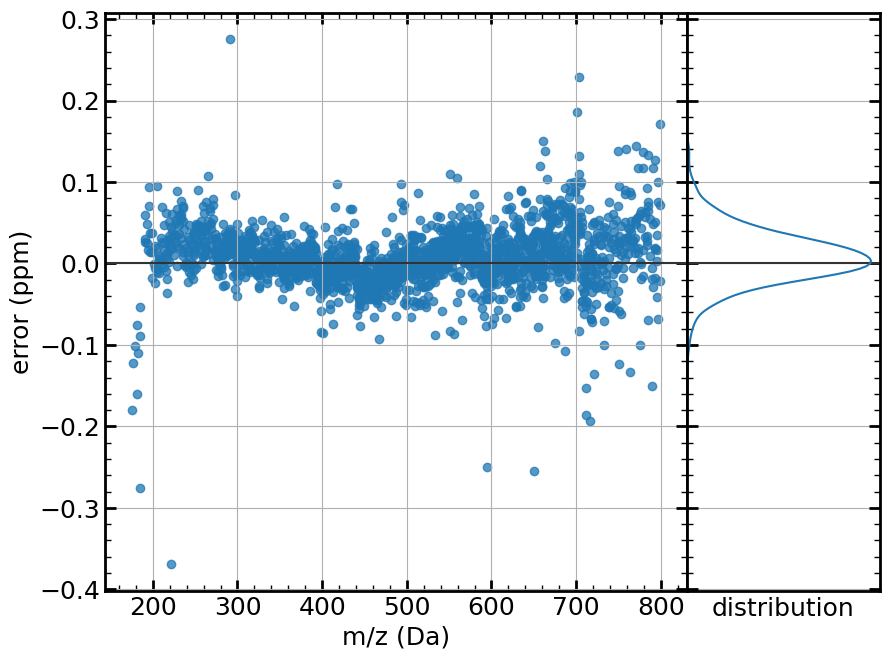

In [8]:
att_pl = lowest_error_attribution(recal_pl, fg, lambda_parameter=0.5)
att_pl.summary()
att_pl.plot.plot_error(distribution=True);

### Iterative attribution

Now, define a series of attribution.

In [9]:
# from there, I define two formula grid and I will attribute iteratively 
# with the first one and the second one.
fg1 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O"],
    limits=[[1, 100], [1, 300], [0, 30]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)
fg2 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O"],
    limits=[[1, 100], [1, 300], [0, 30]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2, (8, 18): 1},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)
fg3 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O", "N"],
    limits=[[1, 100], [1, 300], [0, 30], [0, 5]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2, (7, 15): 1},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)
fg4 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O", "N", "Na"],
    limits=[[1, 100], [1, 300], [0, 30], [0, 5], [0, 1]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)
fg5 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O", "B"],
    limits=[[1, 100], [1, 300], [0, 30], [0, 1]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2, (5, 10): 1},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)
fg6 = FormulaGrid(
    polarity=-1,
    elements=["C", "H", "O", "N", "S", "Na"],
    limits=[[1, 100], [1, 300], [0, 30], [0, 5], [0, 2], [0, 1]],
    mass_bounds=[120, 1200],
    isotopes={(6, 13): 2},
    H_C_bounds=[0.2, 3],
    dbe_bounds=[0, 35],
)

In [10]:
print(fg1)
att_pl = lowest_error_attribution(recal_pl, fg1, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()
print(fg2)
att_pl = lowest_error_attribution(att_pl, fg2, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()
print(fg3)
att_pl = lowest_error_attribution(att_pl, fg3, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()
print(fg4)
att_pl = lowest_error_attribution(att_pl, fg4, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()
print(fg5)
att_pl = lowest_error_attribution(att_pl, fg5, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()
print(fg6)
att_pl = lowest_error_attribution(att_pl, fg6, lambda_parameter=0.2, 
                                  use_isotopes=True)
att_pl.summary()

FormulaGrid: FormulaGrid_0            
   Elements: ['C', 'H', 'O']            
   Elemental Limits: [[1, 100], [1, 300], [0, 30]]            
   Polarity: -1            
   Mass bounds: [120, 1200]            
   H/C ratio bounds: [0.2, 3]            
   DBE bounds: [0, 35]            
   ratio constrains: {}            
   Isotopes: {(6, 13): 2}            
   Combine isotopes: []
 Attribution results:
 Total number of peaks: 4124
 Attributed peaks     : 2416
 Mean error (ppm)     : 0.00742
 Std error (ppm)      : 0.03735
 Attributed percentage: 58.58 %
 hits percentage      : 78.53 %
FormulaGrid: FormulaGrid_0            
   Elements: ['C', 'H', 'O']            
   Elemental Limits: [[1, 100], [1, 300], [0, 30]]            
   Polarity: -1            
   Mass bounds: [120, 1200]            
   H/C ratio bounds: [0.2, 3]            
   DBE bounds: [0, 35]            
   ratio constrains: {}            
   Isotopes: {(6, 13): 2, (8, 18): 1}            
   Combine isotopes: []
 Attribu

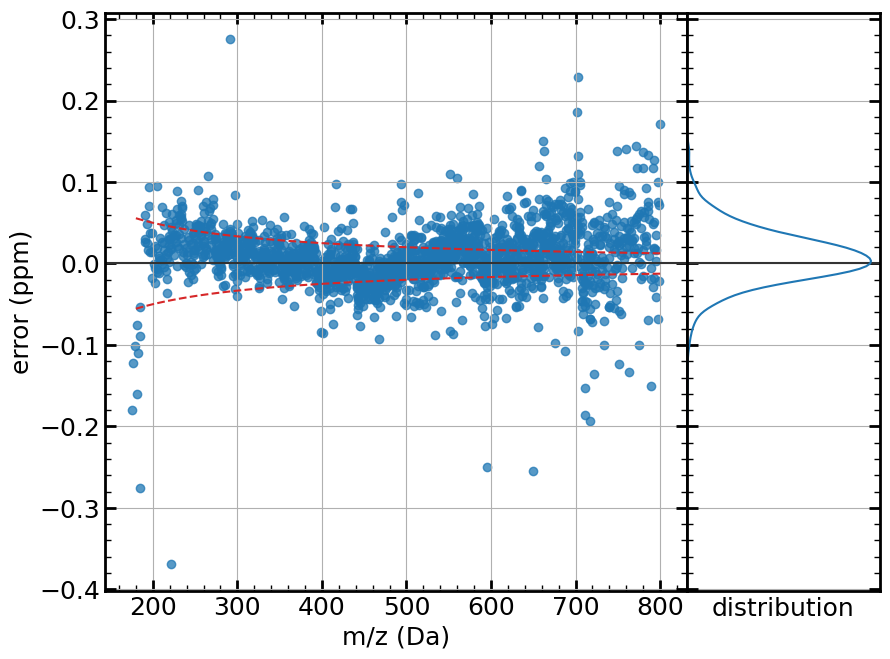

In [10]:
fig = plt.figure()
att_pl.plot.plot_error(distribution=True, fig=fig)

ax = fig.axes[0]
decimals = 5
mz = np.linspace(180, 800, 100)
ax.plot(mz, 10 ** (-decimals) / mz * 1e6, "C3--")
ax.plot(mz, -10 ** (-decimals) / mz * 1e6, "C3--");

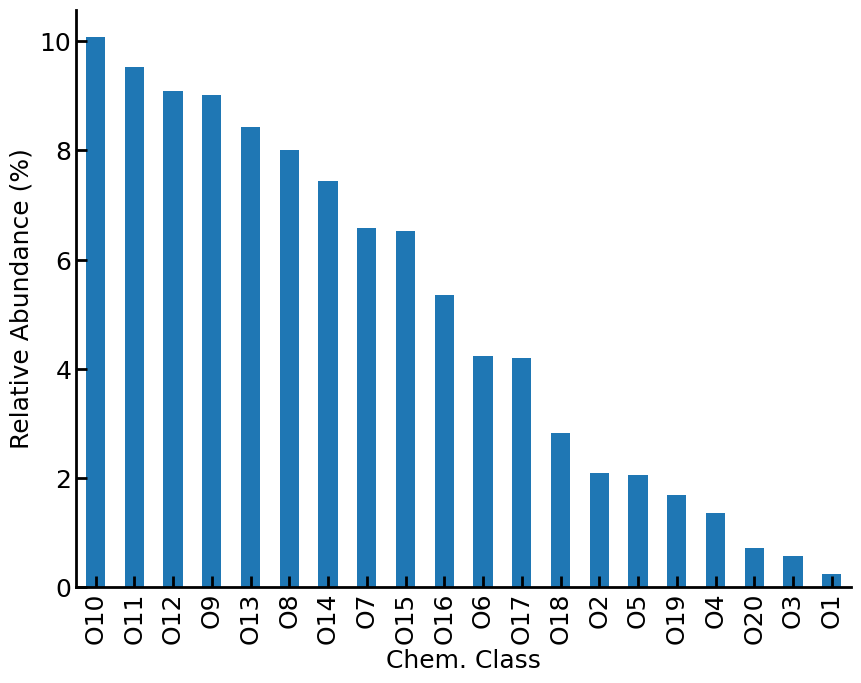

In [11]:
att_pl.plot.plot_classes(threshold=0.2)

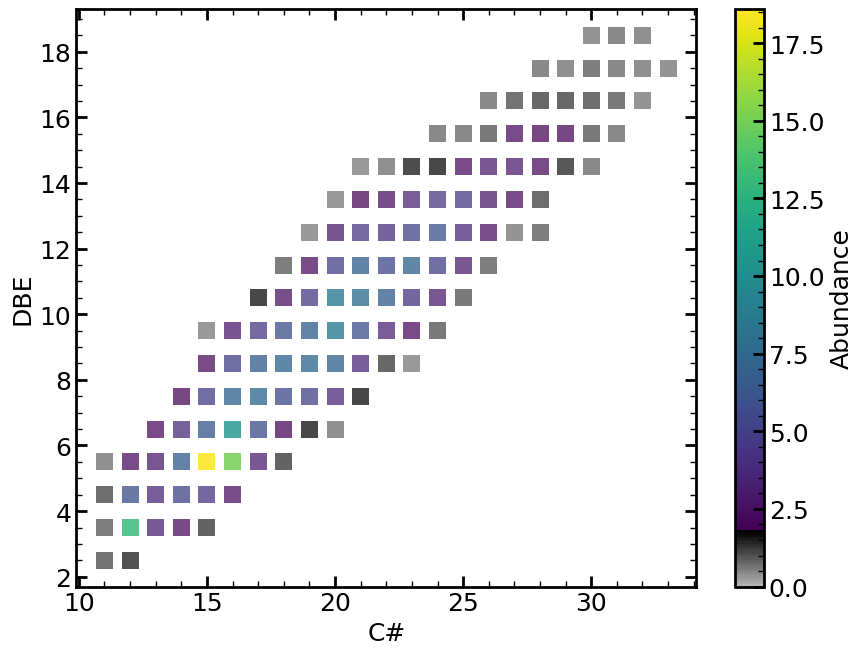

In [12]:
att_pl.plot.plot_dbe(chem_class="O10", markersize=150)
# att_pl.plot.plot_dbe(chem_class="O10", plot_type="KDE", resolution=.8, sigma=.2)

## Display results

In [14]:
from pyc2mc.plotinator.widgenator import display_chem_classes, display_error

In [15]:
display_error(att_pl)

In [16]:
display_chem_classes(att_pl)